In [1]:
#setup
import pandas as pd
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from multidata import MultiData

In [2]:
df = pd.read_feather('../databases/recursos.feather')
df = df.set_index('ano')

# pequena estilização de gráficos não suportados pela MultiData
def config(ax):
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)

# Reservas/Recursos
Vamos começar plotando diretamente os dados de cada recurso/reserva:

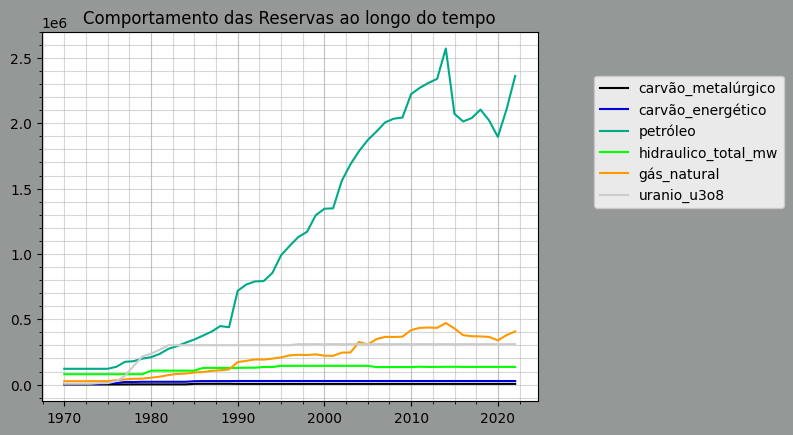

In [3]:
df_energia = df[['carvão_metalúrgico', 'carvão_energético','petróleo', 'hidraulico_total_mw', 'gás_natural', 'uranio_u3o8']]
e = MultiData({'Comportamento das Reservas ao longo do tempo': df_energia})
e.autoplot(0, (13,5))

Percebe-se claramente a escala do petróleo, o Brasil é um país com reservas abundantes, a partir de 1990, com a exploração da bacia de campos e em 2006 com a descoberta do pré-sal, as reservas de petróleo aumentam significativamente. Em meados de 1973/1980, com a crise do petróleo, ao buscar alternativas, o governo investe na exploração de urânio, explicando esse aumento rápido seguido de uma estabilidade que dura até hoje. Gás natural segue uma curva consistente. O potencial hidrelétrico segue aumentando à pequenos passos apesar de ser a principal fonte de energia brasileira atualmente

# Mudanças Percentuais ao Longo do tempo
Visualizar as mudanças percentuais dos recursos vai nos ajudar a encontrar picos de produção, a entender melhor o comportamento ao longo do tempo, também encontrará recursos estagnados/estáveis.

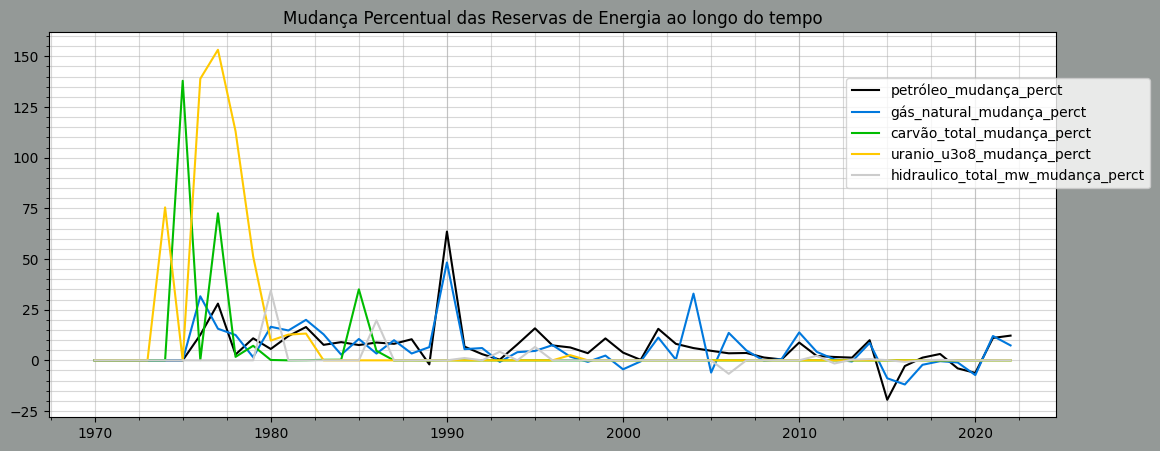

In [4]:
colunas_mudança_perct = df.columns[df.columns.str.endswith('mudança_perct')]
df_mudança_perct = df[colunas_mudança_perct]
e = MultiData({'Mudança Percentual das Reservas de Energia ao longo do tempo': df_mudança_perct})
e.autoplot(0, (21,6))

Logo de cara se vê o "boom" no urânio e no carvão nos anos 1970-1980, seguidos de uma rápida estabilização, Isso se deve à crise do petróleo, como previamente dito, onde o Governo estava em busca de novas fontes de energia, e destinou grandes investimentos à prospecção, pesquisa, desenvolvimento de métodos e técnicas de trabalho e lavra de jazidas de urânio, também passou a buscar mais o carvão (metalúrgico).

A energia hidráulica é uma das principais fontes de energia do país, e se mantém estável durante esse período, possui definitivamente menos oscilações do que petróleo e gás natural, que andam numa trajetória muito semelhante 

# Consumo
Vamos plotar os dados do consumo total de cada recurso energético.

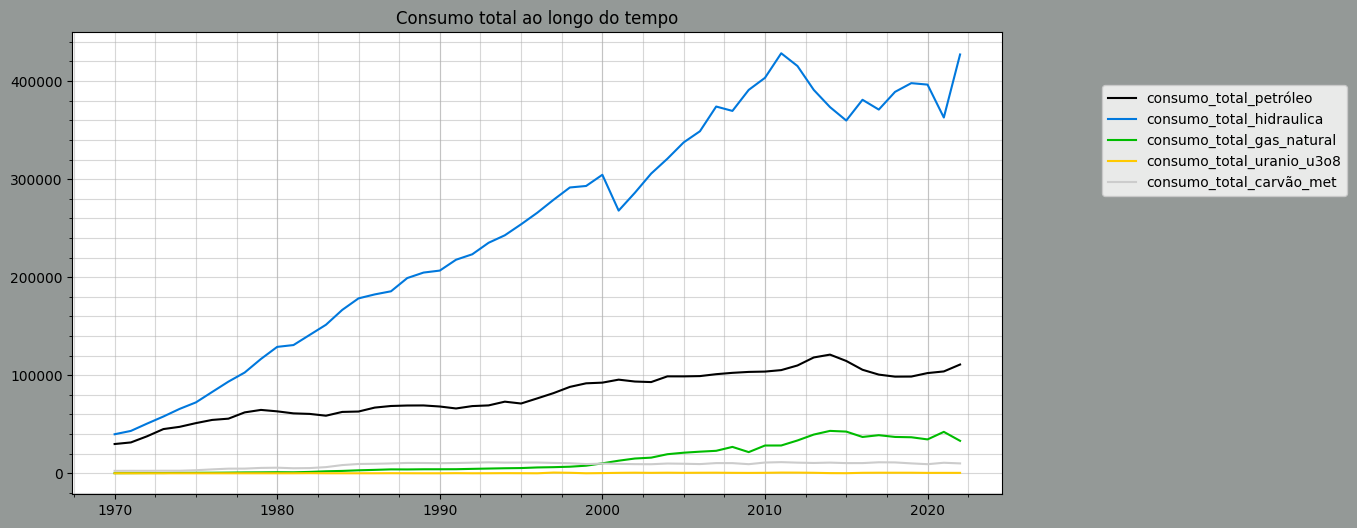

In [13]:
colunas_consumo_total = df.columns[df.columns.str.startswith('consumo_total')]
df_consumo = df[colunas_consumo_total]

e = MultiData({'Consumo total ao longo do tempo': df_consumo})
e.autoplot(0, (1,6))

No brasil, a fonte de energia mais utilizada é a hidrelética, e isso se vê claramente pela escalada do consumo da energia hidrelétrica, o consumo de energia vinda de derivados de petróleo se mantém estável com um leve aumento em meados de 2005. O mais curioso é o comportamento do gás natural, que somente a partir dos anos 2000 viu seu consumo aumentar, se apresentando como alternativa. Urânio e Carvão se mantém estáveis, com baixo consumo final.

# Produção
Vamos plotar os dados de produção de cada recurso.

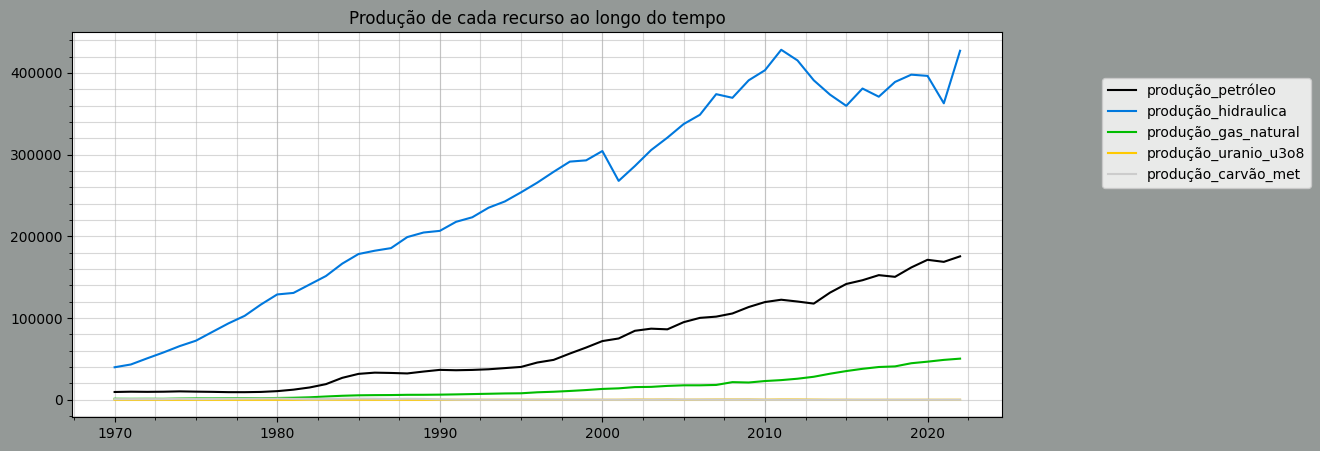

In [6]:
colunas_produção = df.columns[df.columns.str.startswith('produção')]
df_produção = df[colunas_produção]

e = MultiData({'Produção de cada recurso ao longo do tempo': df_produção})
e.autoplot(0, (12,8))

Percebe-se que a produção e o potencial hidrelétrico seguem uma curva idêntica, ou seja, 100% da energia hidrelétrica é consumida, estabelecendo uma relação (muito) linear entre essas variáveis. petróleo e gás seguem um padrão muito parecido. Nota-se que a curva de produção do petróleo é ligeiramente mais íngrime que a de consumo.

# Relação entre o nível das reservas e a produção de energia
Vamos visualizar a relação entre os níveis das reservas e a produção de energia, o que pode ser uma informação importante.

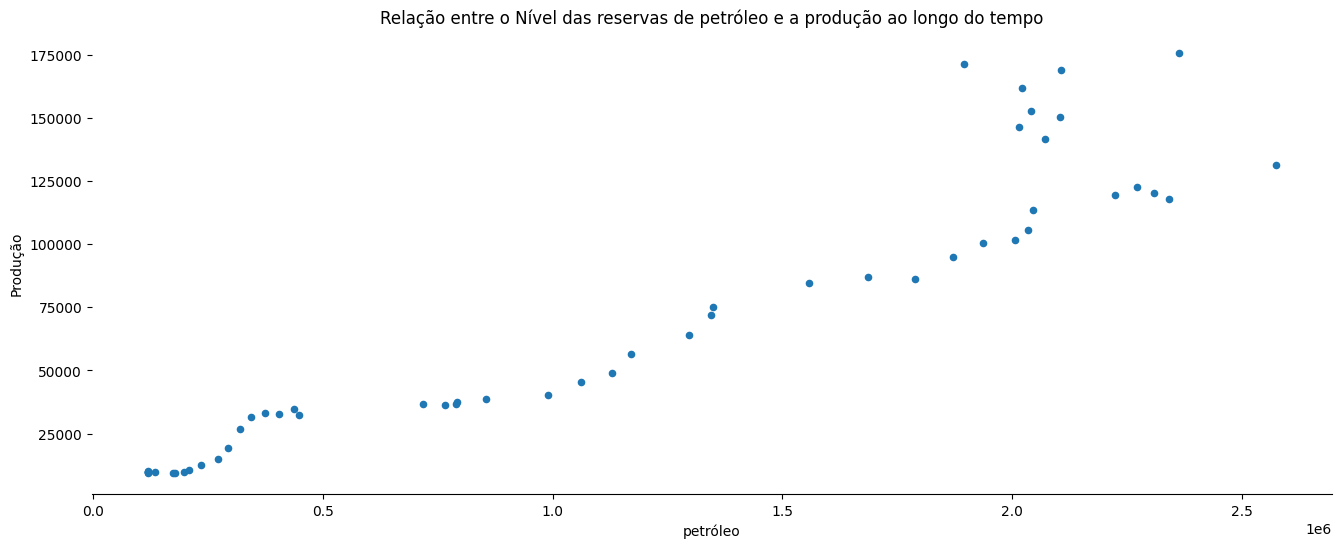

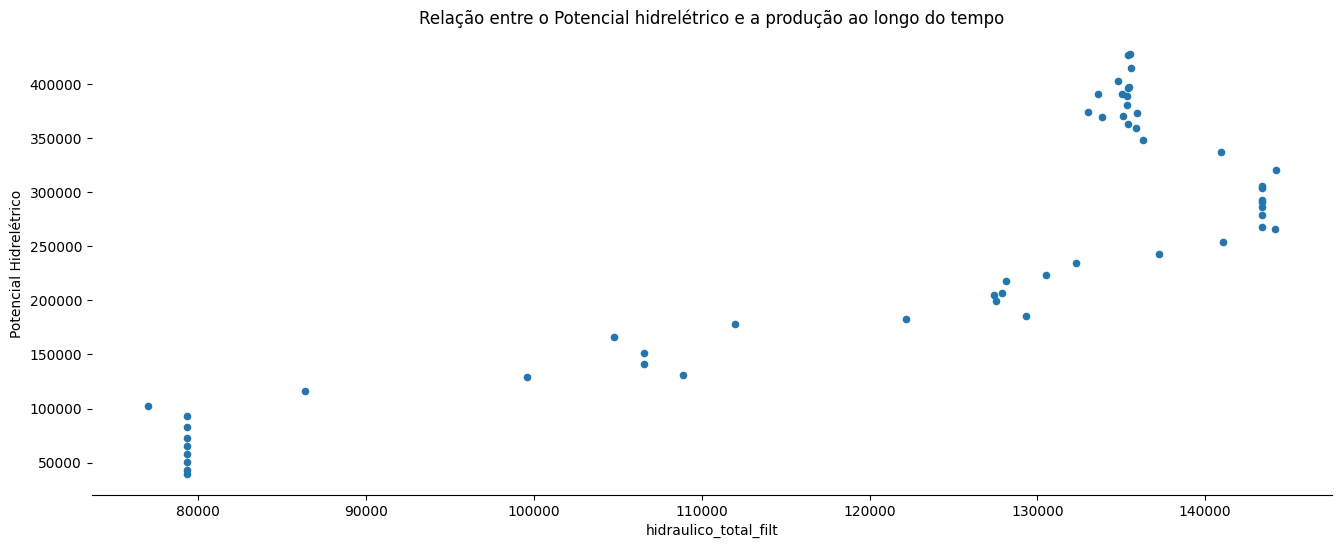

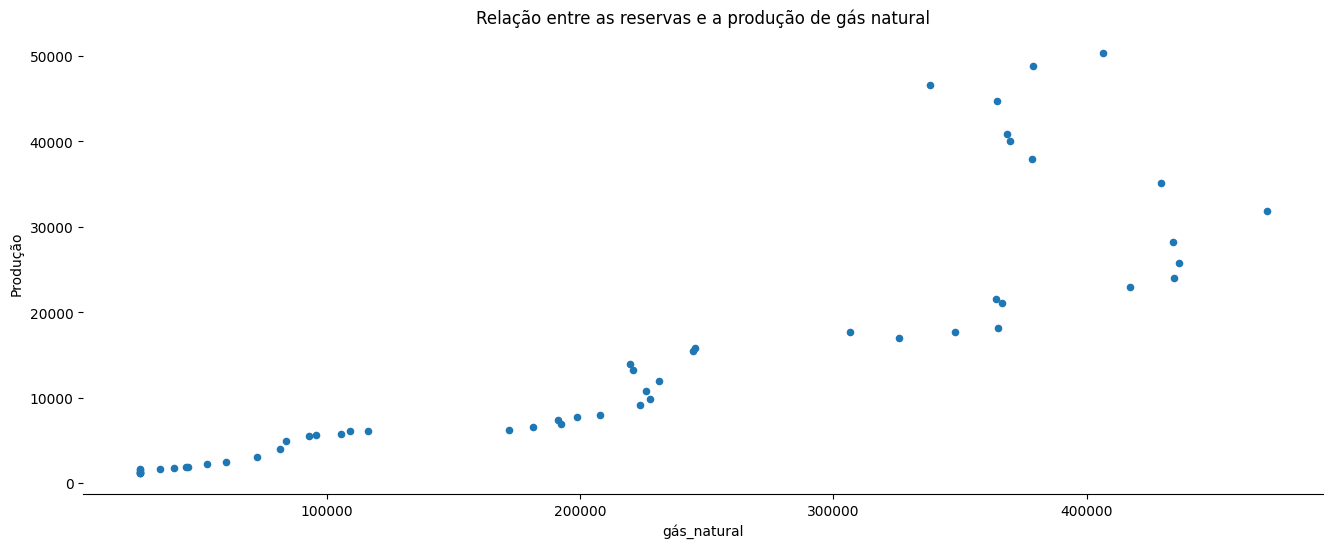

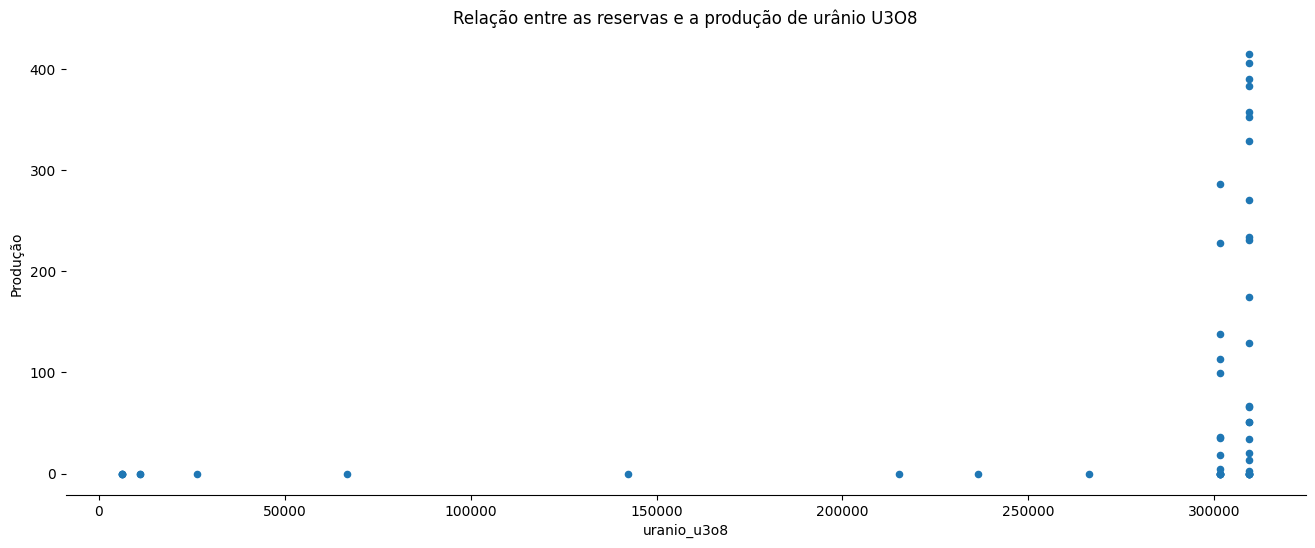

In [7]:
from scipy.signal import savgol_filter

df['hidraulico_total_filt'] = savgol_filter(df['hidraulico_total_mw'], 5, 2)

plot_infos = [
    {
        'x': 'petróleo', 
        'y': 'produção_petróleo',
        'title':"Relação entre o Nível das reservas de petróleo e a produção ao longo do tempo",
        'ylabel': "Produção"
    },
    {
        'x': 'hidraulico_total_filt',
        'y': 'produção_hidraulica',
        'title': "Relação entre o Potencial hidrelétrico e a produção ao longo do tempo",
        'ylabel':"Potencial Hidrelétrico"
    },
    {
        'x': "gás_natural",
        'y':'produção_gas_natural',
        'title':"Relação entre as reservas e a produção de gás natural",
        'ylabel':"Produção",
    },
    {
    'x':'uranio_u3o8',
    'y':"produção_uranio_u3o8",
    'ylabel':"Produção",
    'title':"Relação entre as reservas e a produção de urânio U3O8",
    }
]

for info in plot_infos:
    ax = df.plot(
        x=info['x'],
        y=info["y"],
        ylabel=info['ylabel'],
        title=info['title'],
        figsize=(16,6),
        kind='scatter'
    )
    config(ax)
    



É possível notar a linearidade da relação entre as reservas/recursos e a produção de: petróleo, gás, e do potencial hidrelétrico, como são as mais utilizadas, quanto mais disponível, mais se produz. Já no caso do carvão, a relação é um pouco mais complexa. Já no caso do urânio, houve um aumento drástico, causado pelos acontecimentos de 1970-1980.

# Relação Reservas/Consumo
Vamos fazer uma análise semelhante, desta vez com o consumo total de cada tipo de energia.

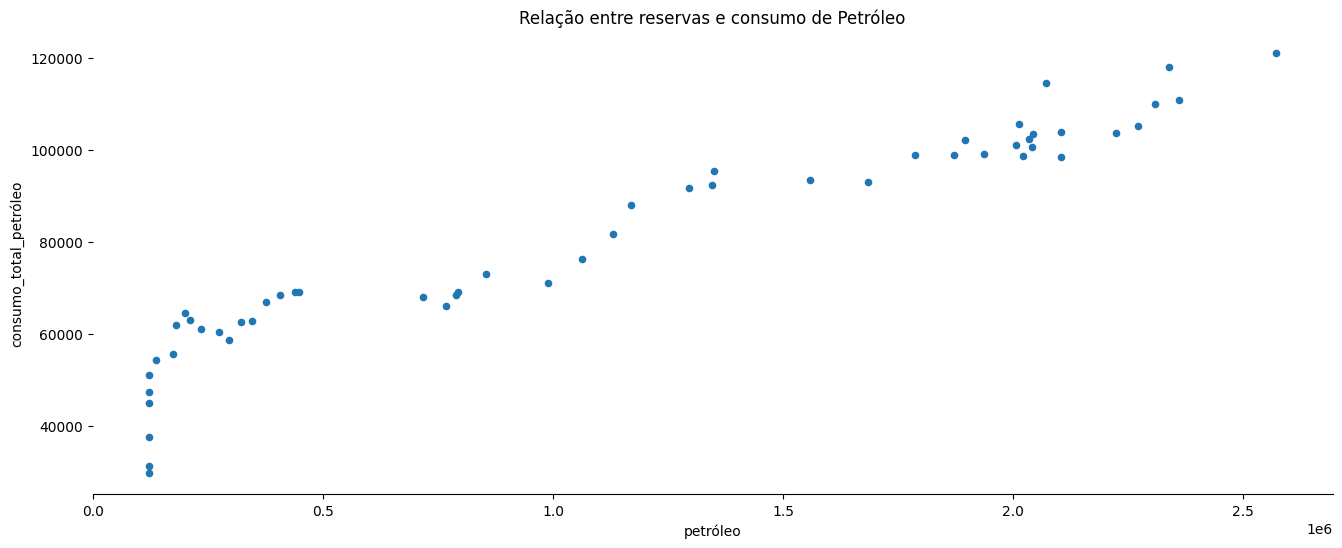

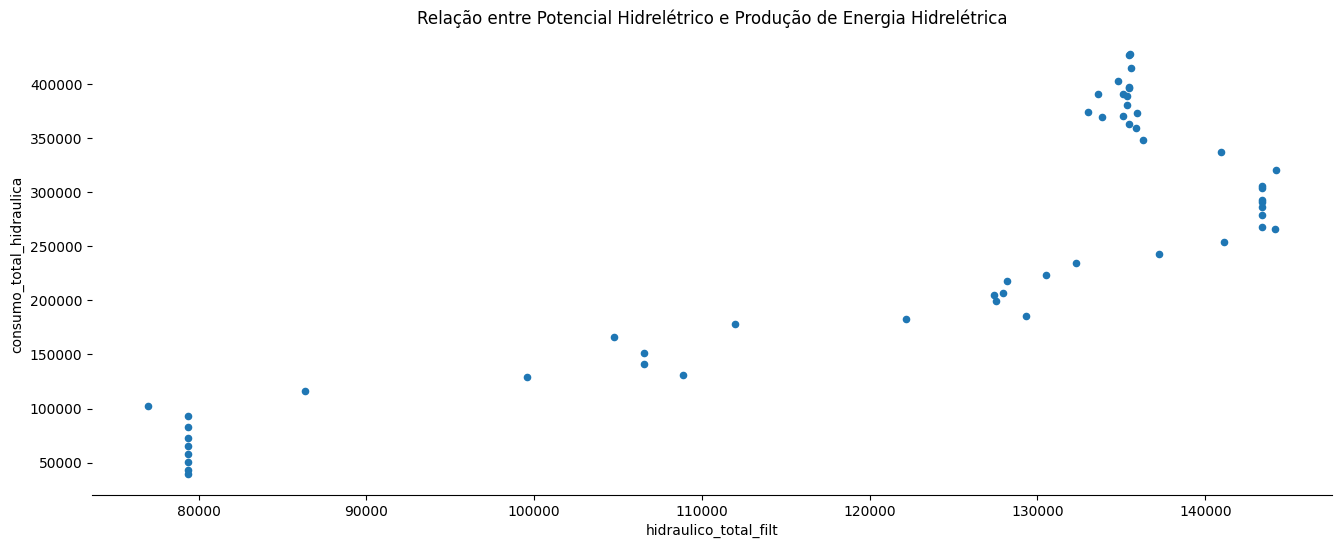

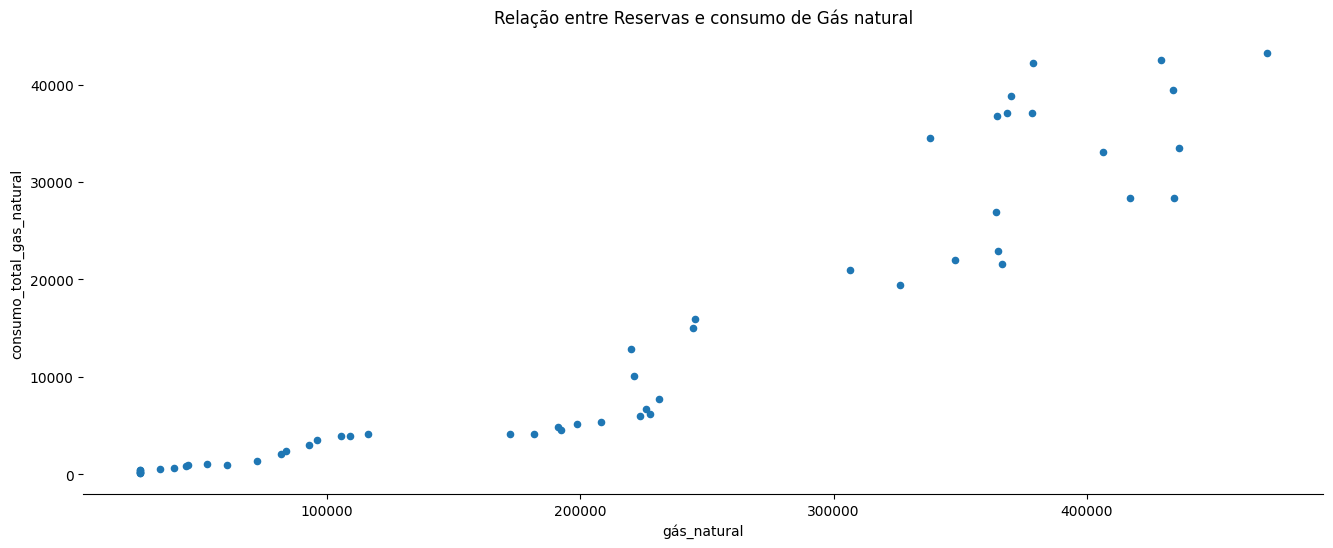

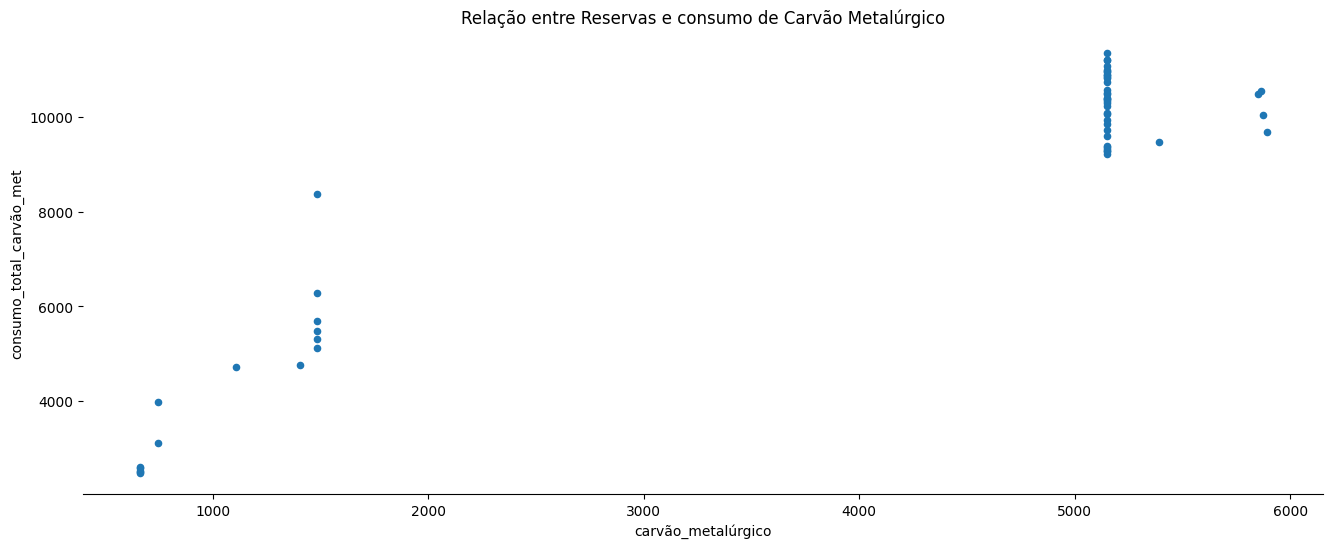

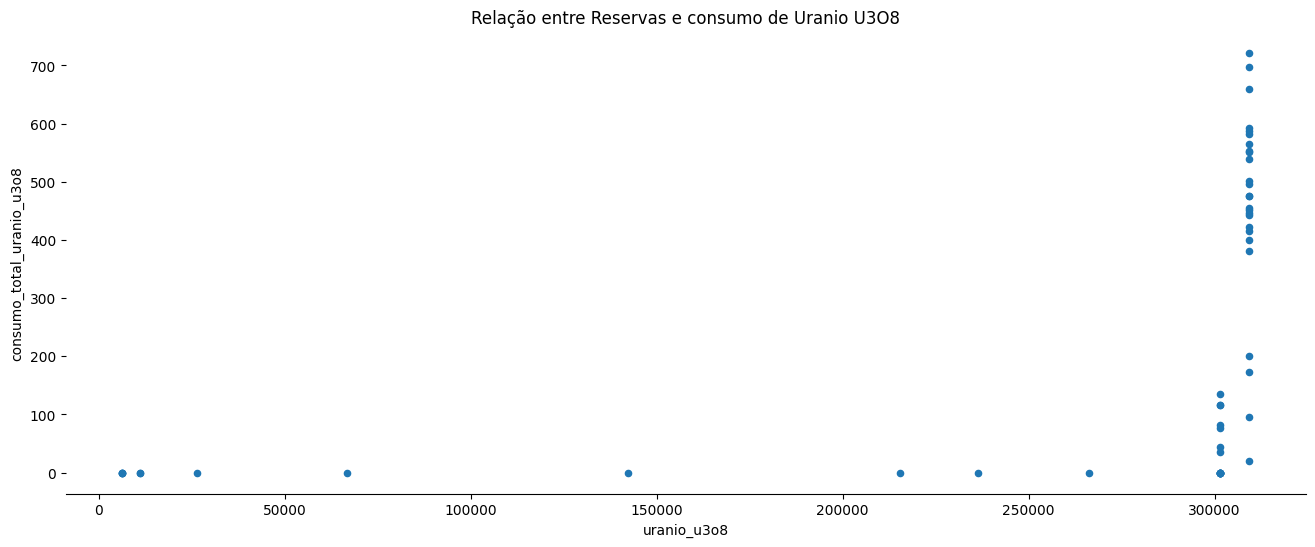

In [8]:
plot_infos = [
    {
        'title':"Relação entre reservas e consumo de Petróleo",
        'x':'petróleo',
        'y':'consumo_total_petróleo', 
    },
    {
        'title':"Relação entre Potencial Hidrelétrico e Produção de Energia Hidrelétrica" ,
        'x':'hidraulico_total_filt',
        'y':'consumo_total_hidraulica',
    },
    {
        'title':"Relação entre Reservas e consumo de Gás natural",
        'x':'gás_natural',
        'y':'consumo_total_gas_natural', 
    },
    {
        'title': "Relação entre Reservas e consumo de Carvão Metalúrgico",
        'x':'carvão_metalúrgico', 
        'y':'consumo_total_carvão_met', 
    },
    {
        'title': "Relação entre Reservas e consumo de Uranio U3O8",
        'x':'uranio_u3o8',
        'y':'consumo_total_uranio_u3o8', 
    }    
]

for plot in plot_infos:
    ax = df.plot(
        title=plot['title'],
        x=plot['x'],
        y=plot['y'], 
        figsize=(16,6), 
        kind="scatter")
    config(ax)

Como esperado, petróleo, gás e p.hidrelétrico continuam com relações linares, porém, carvão metalúrgico desta vez apresentou uma certa linearidade, e o urânio continuou no mesmo padrão de comportamento

# Relação entre Importação e o Nível das reservas 

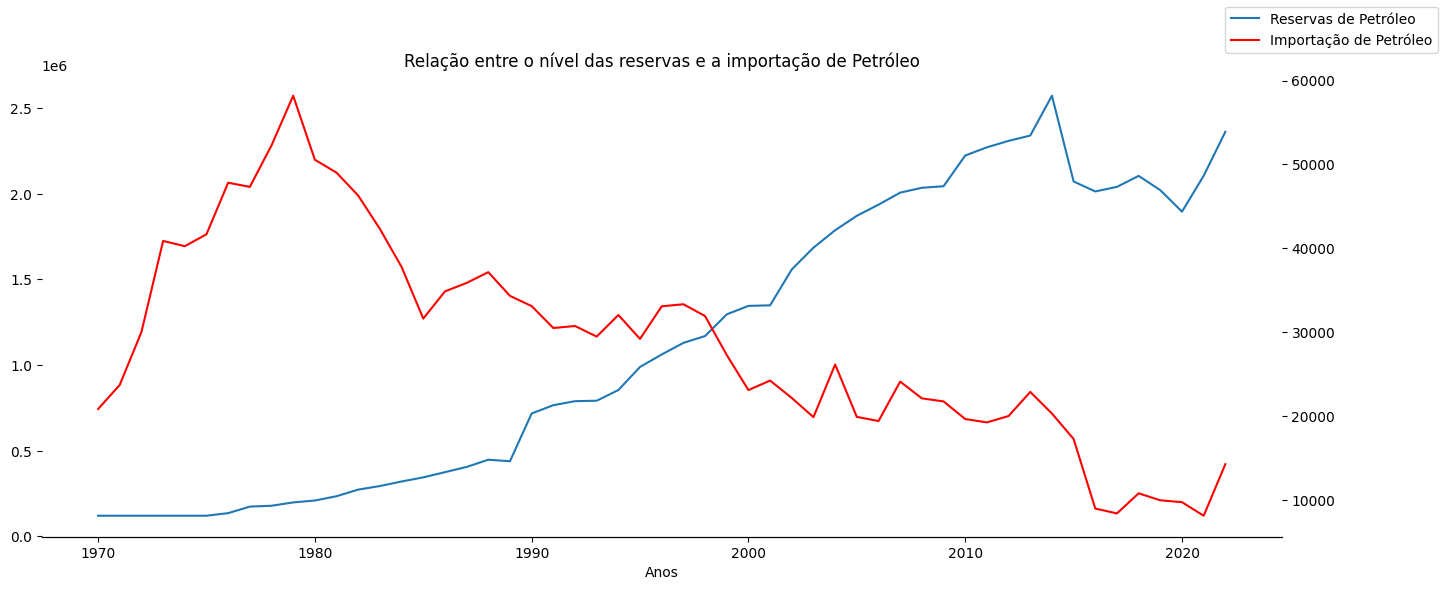

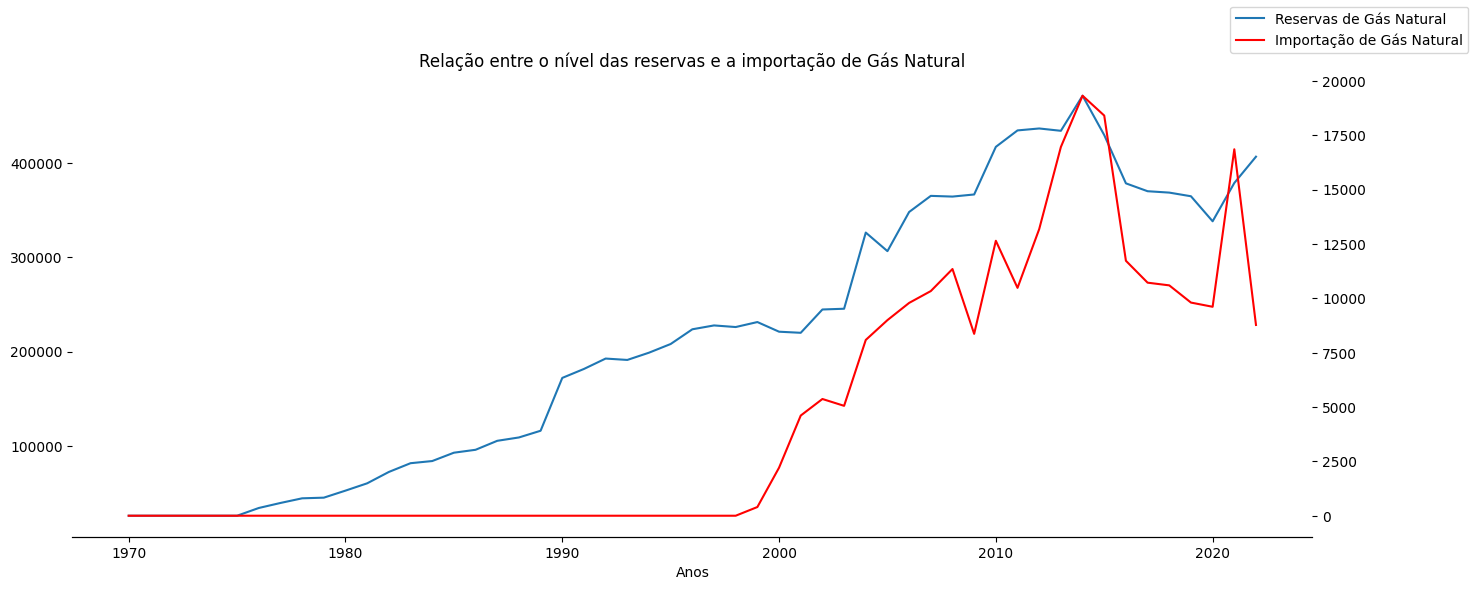

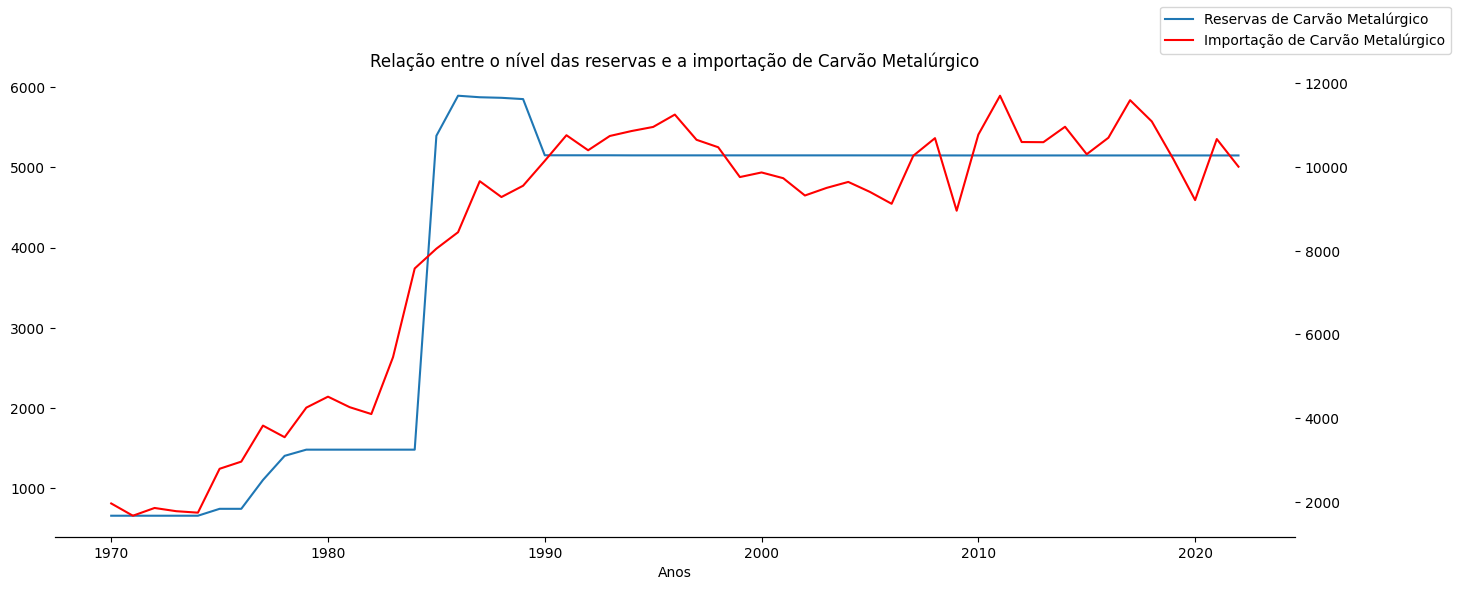

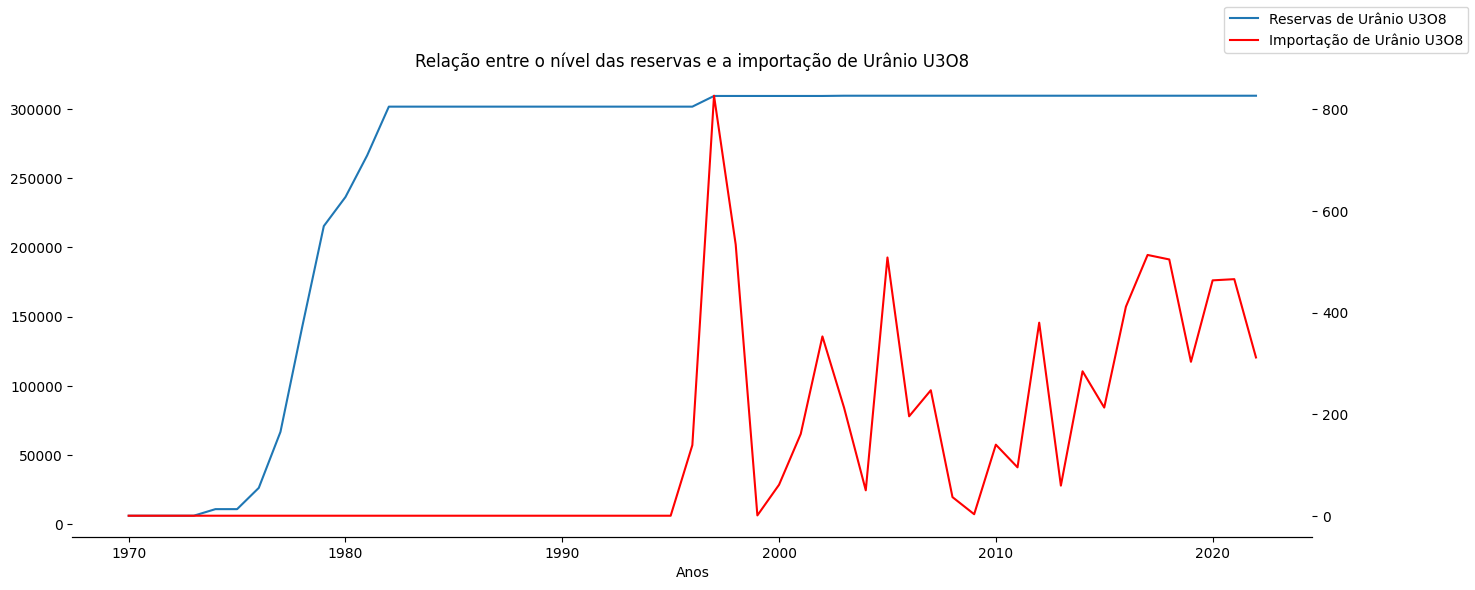

In [9]:
plot_infos = [
    {
        'y1': 'petróleo',
        'y2': 'importação_petróleo',
        'title': 'Relação entre o nível das reservas e a importação de Petróleo',
        'legend': ['Reservas de Petróleo', 'Importação de Petróleo']
    },
    {
        'y1': 'gás_natural',
        'y2': 'importação_gas_natural',
        'title': 'Relação entre o nível das reservas e a importação de Gás Natural',
        'legend': ['Reservas de Gás Natural', 'Importação de Gás Natural']
    },
    {
        'y1': 'carvão_metalúrgico',
        'y2': 'importação_carvão_met',
        'title': 'Relação entre o nível das reservas e a importação de Carvão Metalúrgico',
        'legend': ['Reservas de Carvão Metalúrgico', 'Importação de Carvão Metalúrgico']
    },
    {
        'y1': 'uranio_u3o8',
        'y2': 'importação_uranio_u3o8',
        'title': 'Relação entre o nível das reservas e a importação de Urânio U3O8',
        'legend': ['Reservas de Urânio U3O8', 'Importação de Urânio U3O8']
    },
]

for info in plot_infos:
    ax = df.plot(xlabel="Anos", y=info['y1'], legend=False, figsize=(16,6), title=info['title'])
    ax2 = ax.twinx()
    df.plot(y=info['y2'], figsize=(16,6), ax=ax2, legend=False, color="r")
    ax.figure.legend(info['legend'])
    config(ax2)
    config(ax)


A quantidade de petróleo importado ao longo do tempo cai conforme as reservas de petróleo vão sendo exploradas, o que é o natural de se pensar, porém, para todos os outros tipos de energia, o exato contrário acontece, conforme as reservas aumentam, as importações >também aumentam<.

# Comparativo Reservas de 1970 e de 2022
Vamos plotar os dados e entender se houve mudança na distribuição percentual de reservas energéticas.

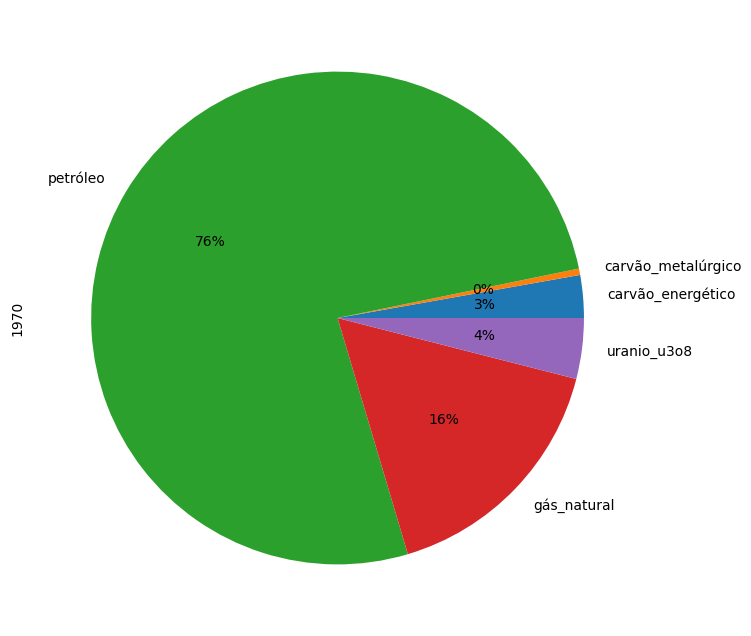

In [10]:
colunas_reservas = ['carvão_energético', 'carvão_metalúrgico', 'petróleo', 'gás_natural', 'uranio_u3o8']
df_1970 = df.query('ano == 1970')
df_1970_reservas = df_1970[colunas_reservas]
ax = df_1970_reservas.iloc[0].plot(kind='pie', autopct='%1.0f%%', figsize=(8,8))

<Axes: ylabel='2022'>

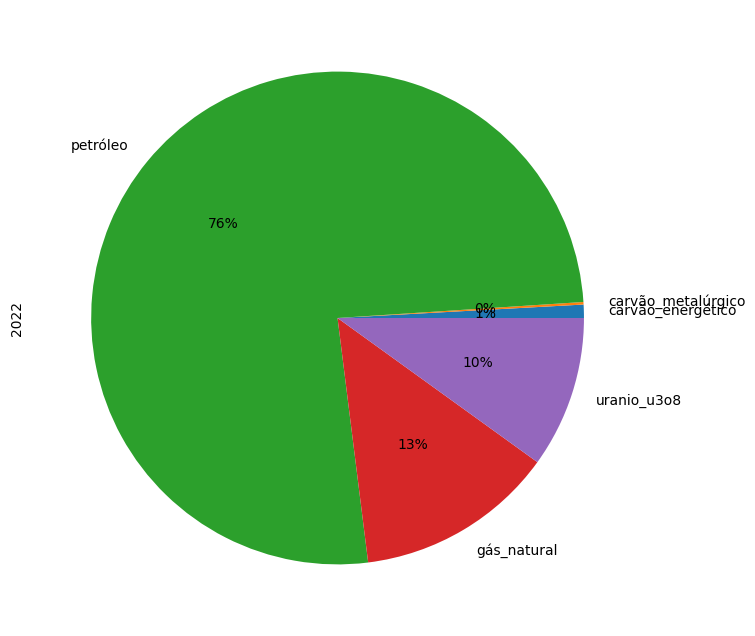

In [11]:
df_2022 = df.query('ano == 2022')
df_2022_reservas = df_2022[colunas_reservas]
df_2022_reservas.iloc[0].plot(kind='pie', figsize=(8,8), autopct='%1.0f%%')

Surpreendentemente os percentuais continuaram praticamente os mesmos, com um certo aumento do urânio com relação aos outros, por conta de exploração ocorrida em (1970, 1980], Segundo o SGB (Serviço Geológico do Brasil), o país tem potencial para ser uma das cinco maiores reservas de urânio do mundo, então esse percentual é no mínimo coerente. Note como o percentual do petróleo permaneceu inalterado embora as reservas auditadas tenham números bem maiores do que em 1970. Os dois tipos de carvão também cresceram, porém não tanto em relação aos outros, perdendo no percentual